In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from textwrap import wrap

data = pd.read_csv('covid-hospit-incid-reg-2021-04-05-19h25.csv', encoding='latin_1', sep=';')
numReg = (data[data.jour=="2021-04-05"]['numReg']).array
nomReg = (data[data.jour=="2021-04-05"]['nomReg']).array
cases = (data[data.jour=="2021-04-05"]['incid_rea']).array

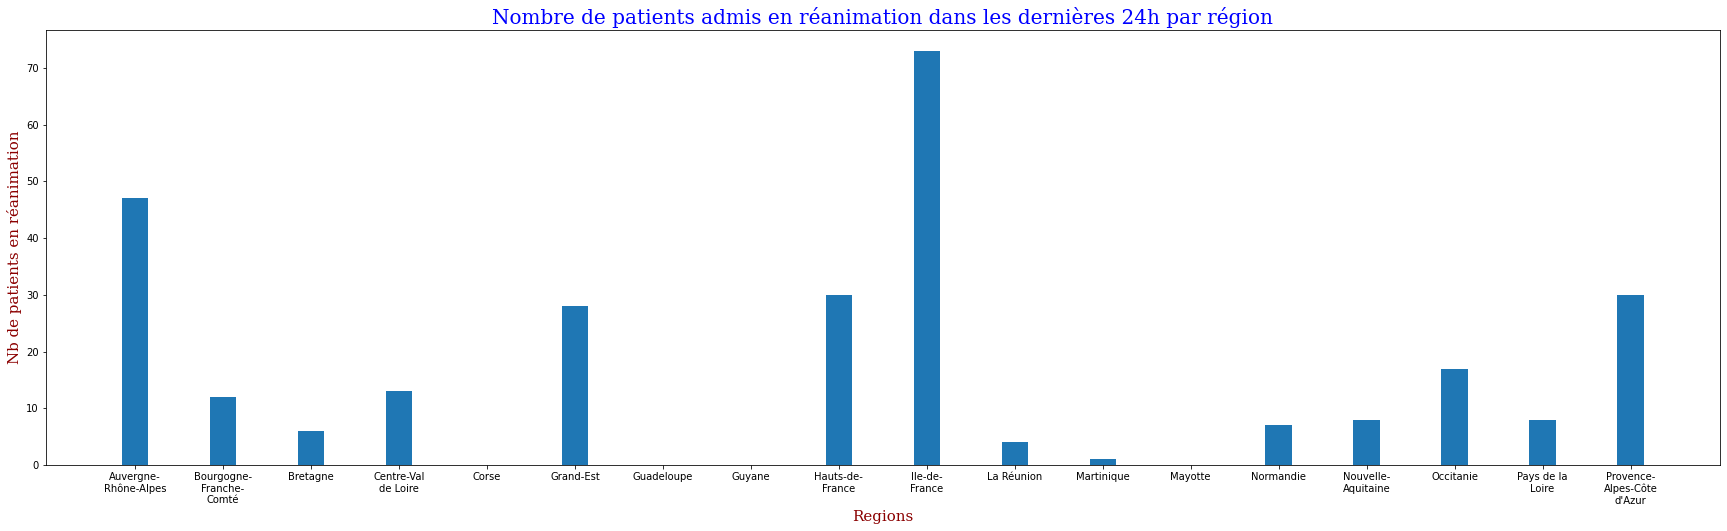

In [3]:
formatted_regions = ['\n'.join(wrap(region, 12)) for region in nomReg]

font_title = {'family':'serif','color':'blue','size':20}
font_axis = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(30,8))
plt.bar(formatted_regions, cases, width = 0.3)
plt.title("Nombre de patients admis en réanimation dans les dernières 24h par région", fontdict=font_title)
plt.xlabel("Regions", fontdict=font_axis)
plt.ylabel("Nb de patients en réanimation", fontdict=font_axis)
plt.show()

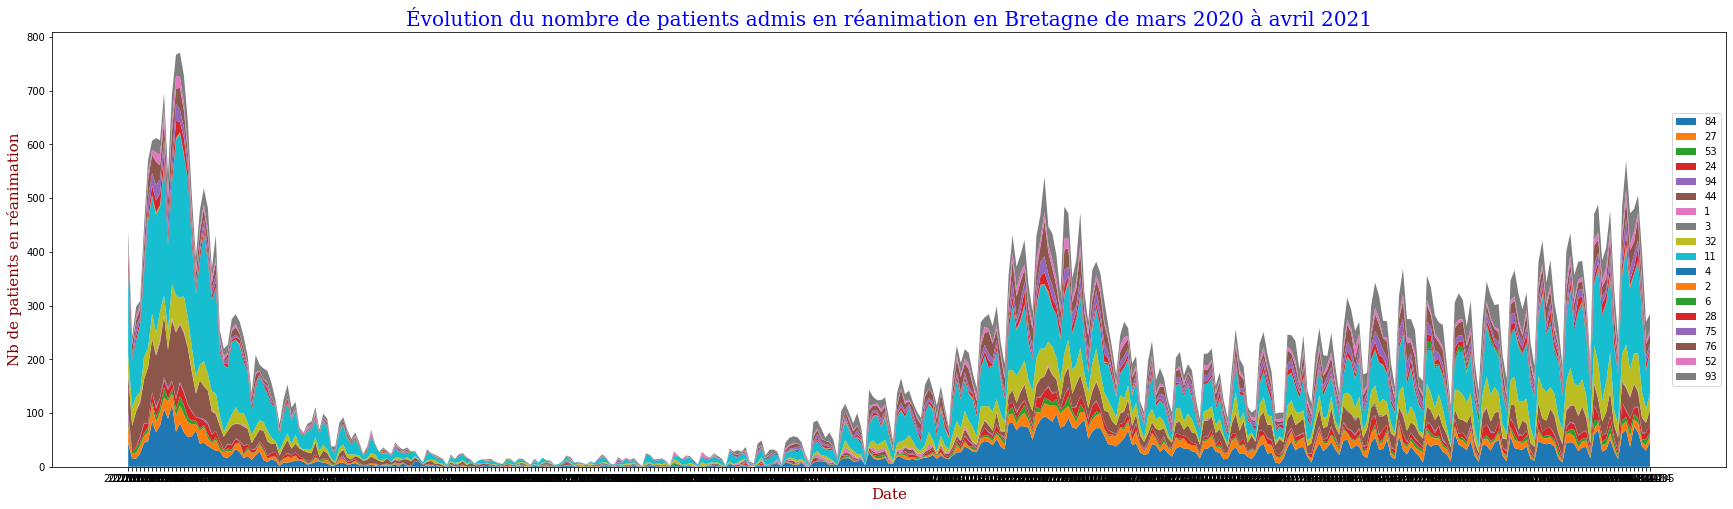

In [22]:
dates = (data['jour']).array
index = 0
days = dates[0::18]
years = [day.replace('-', '') for day in days]
# years = [day[5:7] for day in days]
# years = [day[0:4] for day in days]
# print(years)


rea_by_region = {}
for region in numReg:
    rea = (data[data.numReg==region]['incid_rea']).array
    rea_by_region[region] = rea
    
# for region in nomReg:
#     rea = (data[data.nomReg==region]['incid_rea']).array
#     rea_by_region[region] = rea

fig, ax = plt.subplots(figsize=(30,8))
ax.stackplot(years, rea_by_region.values(), labels=rea_by_region.keys())

ax.legend(loc='right')
ax.set_title('Évolution du nombre de patients admis en réanimation en Bretagne de mars 2020 à avril 2021', fontdict=font_title)
ax.set_xlabel('Date', fontdict=font_axis)
ax.set_ylabel('Nb de patients en réanimation', fontdict=font_axis)

plt.show()